**Author: Heitor José Tessaro**

The purpose of this file is to evaluate a CNN previously trainned. The CNN performs event classification related to the operation of synchronous generator. A maximum of 15 classes are considered in the training process. 

---



Import libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader # gives easier dataset manegment and creates mini batches
import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
from google.colab import files
import zipfile
import glob
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import itertools

Remove all existing files

In [ ]:
filesID = glob.glob('./*.eps')
for f in filesID:
    os.remove(f)

filesID = glob.glob('./*.npy')
for f in filesID:
    os.remove(f)    

filesID = glob.glob('./*.pth')
for f in filesID:
    os.remove(f)

filesID = glob.glob('./*.zip')
for f in filesID:
    os.remove(f)

filesID = glob.glob('./*.csv')
for f in filesID:
    os.remove(f)  

Definition of the dataset class and the network used

In [ ]:
class EventosDataset(Dataset):
    # csv_file: provide the dataset file names and its class
    # root_dir: path to the files
    # transform: transformation to the data files
    def __init__(self, csv_file, root_dir, transform = None):
        self.annotation = shuffle(pd.read_csv(csv_file))
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotation) 

    def __getitem__(self,index):
        data_path = os.path.join(self.root_dir, self.annotation.iloc[index,0])
        np_data = np.load(data_path)
        data = torch.as_tensor(np_data)/255
        label = torch.tensor(int(self.annotation.iloc[index,1]))
        return(data,label)

    def __plotImage__(self):
        n_samples = dataset.__len__()
        index = random.randint(0, n_samples)
        data_path = os.path.join(self.root_dir, self.annotation.iloc[index,0])
        np_data = np.load(data_path)
        fig = plt.figure(figsize=(10, 7),constrained_layout=True)
        ax1 = plt.subplot(2,3,1)
        plt.imshow(np_data[0,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        plt.title('Zero')
        plt.rc('font', size=18) 
        ax2 = plt.subplot(2,3,2)
        plt.imshow(np_data[1,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        plt.title('Positive')
        ax3 = plt.subplot(2,3,3)
        plt.imshow(np_data[2,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        plt.title('Negative')
        ax4 = plt.subplot(2,3,4)
        plt.imshow(np_data[3,:,:],cmap='gray')
        plt.axis('off')
        plt.title('Zero')
        ax5 = plt.subplot(2,3,5)
        plt.imshow(np_data[4,:,:],cmap='gray')
        plt.axis('off')
        plt.title('Positive')
        ax6 = plt.subplot(2,3,6)
        plt.imshow(np_data[5,:,:],cmap='gray')                                
        plt.axis('off')
        plt.title('Negative')
        plt.subplots_adjust(left=0.01,
                    bottom=0.01, 
                    right=0.99, 
                    top=0.99, 
                    wspace=0.1, 
                    hspace=0.1)
        
        return print(self.annotation.iloc[index,0])

    def __downloadImage__(self):
        n_samples = dataset.__len__()
        index = random.randint(0, n_samples)
        data_path = os.path.join(self.root_dir, self.annotation.iloc[index,0])
        base = os.path.basename(data_path)
        fileID = os.path.splitext(base)[0]
        np_data = np.load(data_path)
        fig = plt.figure(figsize=(10, 7),constrained_layout=True)
        ax1 = plt.subplot(2,3,1)
        plt.imshow(np_data[0,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        # plt.title('Zero')
        plt.rc('font', size=18) #controls default text size
        ax2 = plt.subplot(2,3,2)
        plt.imshow(np_data[1,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        # plt.title('Positive')
        ax3 = plt.subplot(2,3,3)
        plt.imshow(np_data[2,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        # plt.title('Negative')
        ax4 = plt.subplot(2,3,4)
        plt.imshow(np_data[3,:,:],cmap='gray',vmin=0,vmax=255)
        plt.axis('off')
        # plt.title('Zero')
        ax5 = plt.subplot(2,3,5)
        plt.imshow(np_data[4,:,:],cmap='gray')
        plt.axis('off')
        # plt.title('Positive')
        ax6 = plt.subplot(2,3,6)
        plt.imshow(np_data[5,:,:],cmap='gray')                                
        plt.axis('off')
        # plt.title('Negative')
        plt.subplots_adjust(left=0.01,
                    bottom=0.01, 
                    right=0.99, 
                    top=0.99, 
                    wspace=0.05, 
                    hspace=0.05)
        fileName = fileID + '.eps'
        fig.savefig(fname = fileName ,  bbox_inches='tight')
        fileDownload = './'+fileName
        files.download(fileDownload)
                                      
        return print(self.annotation.iloc[index,0])

In [ ]:
ConvNet = nn.Sequential(
    nn.Conv2d(in_channels= 6, out_channels= 36, 
                          kernel_size= 6, stride= 2 ),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2),
    nn.BatchNorm2d(36),
    nn.Conv2d(in_channels= 36, out_channels= 50,
                               kernel_size= 6, stride= 1 ),    
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2),
    nn.BatchNorm2d(50),    
    nn.Conv2d(in_channels= 50, out_channels= 100,
                               kernel_size= 7, stride= 1 ), 
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2, stride = 2),
    nn.BatchNorm2d(100),    
    nn.Flatten(start_dim = 1),
    nn.Linear(in_features= 100*3*3, out_features= 300),
    nn.ReLU(),
    nn.Dropout(p= 0.3),
    nn.Linear(in_features= 300, out_features= 50),
    nn.ReLU(),
    nn.Dropout(p= 0.3),
    nn.Linear(in_features= 50, out_features= 15)
)

Upload the csv file with data from the files and respective classes. This step is kept because we want to compare the accuracy of the network. In the case of performing only predictions, this file would not be necessary. 

In [ ]:
filesID = glob.glob('./*.csv')
for f in filesID:
    os.remove(f)

files.upload()

Saving data.csv to data.csv


{'data.csv': b'File names,class \ndesenergizacao1.npy,0\ndesenergizacao2.npy,0\ndesenergizacao3.npy,0\ndesenergizacao4.npy,0\ndesenergizacao5.npy,0\ndesenergizacao6.npy,0\ndesenergizacao7.npy,0\ndesenergizacao8.npy,0\ndesenergizacao9.npy,0\ndesenergizacao10.npy,0\ndesenergizacao11.npy,0\ndesenergizacao12.npy,0\ndesenergizacao13.npy,0\ndesenergizacao14.npy,0\ndesenergizacao15.npy,0\ndesenergizacao16.npy,0\ndesenergizacao17.npy,0\ndesenergizacao18.npy,0\ndesenergizacao19.npy,0\ndesenergizacao20.npy,0\ndesenergizacao21.npy,0\ndesenergizacao22.npy,0\ndesenergizacao23.npy,0\ndesenergizacao24.npy,0\ndesenergizacao25.npy,0\ndesenergizacao26.npy,0\ndesenergizacao27.npy,0\ndesenergizacao28.npy,0\ndesenergizacao29.npy,0\ndesenergizacao30.npy,0\nincrementoCarga1.npy,1\nincrementoCarga2.npy,1\nincrementoCarga3.npy,1\nincrementoCarga4.npy,1\nincrementoCarga5.npy,1\nincrementoCarga6.npy,1\nincrementoCarga7.npy,1\nincrementoCarga8.npy,1\nincrementoCarga9.npy,1\nincrementoCarga10.npy,1\nincrementoCarg

Uploading the npyData file. The file must be compressed in zip format.

In [ ]:
filesID = glob.glob('./npyData_ruido/*')
for f in filesID:
    os.remove(f)

files.upload()

# with zipfile.ZipFile("npyData.zip","r") as zip_ref:
# with zipfile.ZipFile("npyDataAvaliacaoRuido.zip","r") as zip_ref:
with zipfile.ZipFile("npyData_ruido.zip","r") as zip_ref:
    zip_ref.extractall(".")

Saving npyData_ruido.zip to npyData_ruido.zip


Define the dataset and the classes considered. Two classses set are presented. The first one considers each temporary fault event as a diferent class. The seccond one considers that all temporary fault events belong to just one class (NOOP05).

In [ ]:
# dataset = EventosDataset(csv_file = 'data.csv', root_dir = './npyData',
# dataset = EventosDataset(csv_file = 'data.csv', root_dir = './npyDataAvaliacaoRuido',
dataset = EventosDataset(csv_file = 'data.csv', root_dir = './npyData_ruido',                         
                         transform= None)

classes = ('DESE01', 'LINC02', 'LDEC03', 
           'SPFH04', 'SPFL05', 'DPFH06', 'DPFL07', 
           'DGFH08', 'DGFL09', 'SGFH10', 'SGFL11',
           'SPTH12', 'DPTH13', 'DGTH14', 
           'SGTH15' )

classes = ('DESE01', 'LINC02', 'LDEC03', 
           'SPFH04', 'SPFL05', 'DPFH06', 'DPFL07', 
           'DGFH08', 'DGFL09', 'SGFH10', 'SGFL11',
           'NOOP05')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ConvNet3.to(device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:108: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FaltaBiAT_G_EXT24.npy


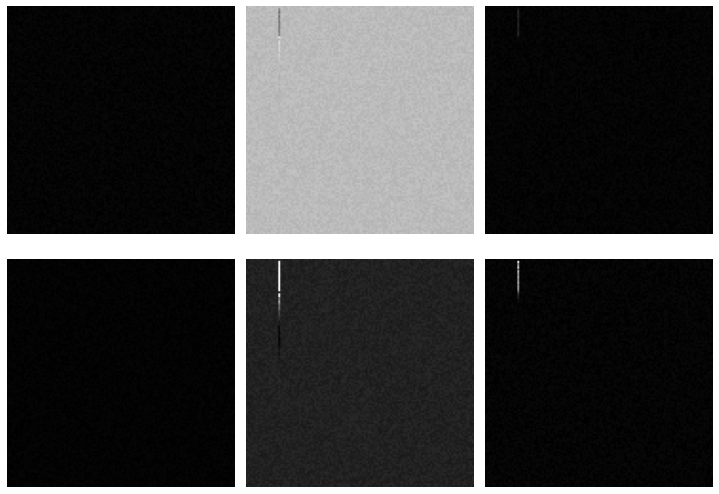

In [ ]:
dataset.__downloadImage__()

Load the parameters from a priviously trainned CNN

In [ ]:
# path to the model file
files.upload()
# with zipfile.ZipFile("pytorchModelBestLoss.zip","r") as zip_ref:
with zipfile.ZipFile("pytorchModelBestAccu.zip","r") as zip_ref:
# with zipfile.ZipFile("pytorchModel.zip","r") as zip_ref:
    zip_ref.extractall(".")
# FILE = './model_best_loss.pth'
FILE = './model_best_accu.pth'
# FILE = './model.pth'
# load the net structure
model = ConvNet.to(device)
# load the parameters from the FILE
model.load_state_dict(torch.load(FILE))
# uses the network in the evaluation mode, witout calculating the gradients
model.eval()

Saving pytorchModelBestAccu.zip to pytorchModelBestAccu.zip


Sequential(
  (0): Conv2d(6, 36, kernel_size=(6, 6), stride=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(36, 50, kernel_size=(6, 6), stride=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Conv2d(50, 100, kernel_size=(7, 7), stride=(1, 1))
  (9): ReLU()
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=900, out_features=300, bias=True)
  (14): ReLU()
  (15): Dropout(p=0.3, inplace=False)
  (16): Linear(in_features=300, out_features=50, bias=True)
  (17): ReLU()
  (18): Dropout(p=0.3, inplace=Fals

Function to get prediction for all examples provided.

In [ ]:
def get_all_preds(model, loader):
    with torch.no_grad():
        model.eval()
        all_preds = torch.tensor([]).to(device)
        for batch in loader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)

            preds = model(images)
            all_preds = torch.cat(
                (all_preds, preds)
                ,dim=0)
    return all_preds

Create two new dataloars. One is used to get the prediction for all examples provided by the dataset loaded previously. The other contains all the correct labels. The predictions are used to create the confusion matrix.

In [ ]:
with torch.no_grad():
    model.eval()
    batch_size = int(len(dataset))

    targets_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size)
    prediction_loader = []
    prediction_loader = torch.utils.data.DataLoader(dataset, batch_size= int(batch_size/10))
    preds = []
    preds = get_all_preds(model, prediction_loader)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
targets = torch.tensor([]).to(device)
for images, labels in targets_loader:
    targets = labels

Create the confusion matrix. Then a function to plot the confusion matrix is definided.

In [ ]:
targets_np = targets.numpy()
preds_np = preds.argmax(dim=1).cpu()
cm = confusion_matrix(targets_np, preds_np)

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

Plot the confusion matrix, save the figure, then doenload the figure file.

Confusion matrix, without normalization


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

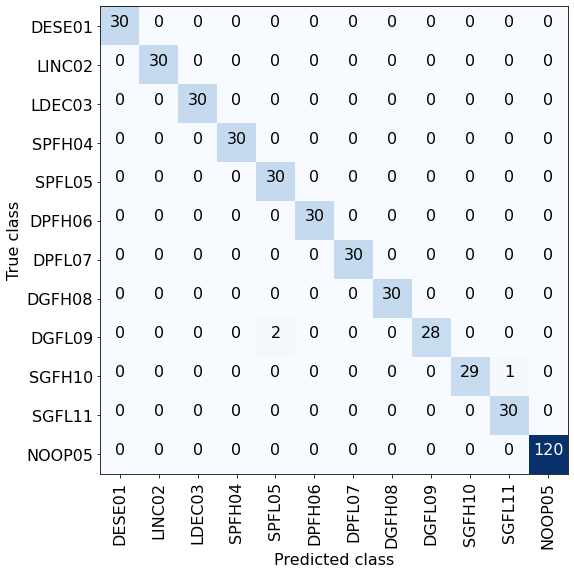

In [ ]:
fig = plt.figure(figsize=(8,9))
plt.rc('font', size=16) #controls default text size
plot_confusion_matrix(cm, classes)
fig.savefig(fname = 'confusion_matrix.eps' ,  bbox_inches='tight')
files.download('./confusion_matrix.eps')

Presents the global accuracy and the accuracy for each class evaluated.

In [ ]:
with torch.no_grad():
    model.eval()
    acc = 0
    predicted = []
    n_correct = 0
    n_samples = 0
    n_class_correct = []
    n_class_correct = [0 for i in range(len(classes))]
    n_class_samples = []
    n_class_samples = [0 for i in range(len(classes))]
    # print(n_class_correct)
    for images, labels in targets_loader:
        images = images.to(device)
        labels = labels.to(device)
        # print(labels.shape)
        outputs = model(images)

        # max returns (value, index)
        predicted = [0 for i in range(outputs.shape[0])]
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        for i in range(outputs.shape[0]):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')
    print()

    for i in range(len(classes)):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network: 99.33333333333333 %

Accuracy of DESE01: 100.0 %
Accuracy of LINC02: 100.0 %
Accuracy of LDEC03: 100.0 %
Accuracy of SPFH04: 100.0 %
Accuracy of SPFL05: 100.0 %
Accuracy of DPFH06: 100.0 %
Accuracy of DPFL07: 100.0 %
Accuracy of DGFH08: 100.0 %
Accuracy of DGFL09: 93.33333333333333 %
Accuracy of SGFH10: 96.66666666666667 %
Accuracy of SGFL11: 100.0 %
Accuracy of NOOP05: 100.0 %
